In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('data/cleaned_rounds_data.csv')
df.head()

,round_winner,player_1_team_name,player_1_name,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,G2 Esports,NiKo,0,1.0,1.0,0,0,0.0,700.0,...,0,0,0,0,1,0,1,1,0,0
1,1,G2 Esports,NiKo,0,1.0,2.0,0,1,100.0,4100.0,...,0,0,0,0,1,1,1,1,0,0
2,0,G2 Esports,NiKo,0,1.0,3.0,0,1,100.0,5100.0,...,0,0,0,0,1,1,0,1,0,0
3,1,G2 Esports,NiKo,0,3.0,4.0,0,1,100.0,2800.0,...,0,0,0,0,1,1,0,1,0,0
4,1,G2 Esports,NiKo,0,4.0,5.0,0,0,0.0,200.0,...,0,0,0,0,1,1,1,1,0,0


In [12]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,0,1.0,1.0,0,0,0.0,700.0,1650.0,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,1.0,2.0,0,1,100.0,4100.0,150.0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1.0,3.0,0,1,100.0,5100.0,1000.0,1,...,0,0,0,0,1,1,0,1,0,0
3,1,0,3.0,4.0,0,1,100.0,2800.0,400.0,0,...,0,0,0,0,1,1,0,1,0,0
4,1,0,4.0,5.0,0,0,0.0,200.0,3100.0,0,...,0,0,0,0,1,1,1,1,0,0


In [13]:
def sigmoid(z):
    """Numerically stable sigmoid function."""
    z = np.clip(z, -500, 500)  # Limit z to avoid overflow
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))

In [14]:
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [15]:
def compute_gradients(X, y, y_pred):
    diff = y_pred - y
    return np.dot(X.T, diff) / len(y)

In [16]:
def initialize_weights(size):
    std_dev = np.sqrt(2 / (size + 1))
    return np.random.randn(size) * std_dev

In [17]:
def logistic_regression(X, y, lr, epochs, e=1e-6):
    w = initialize_weights(X.shape[1])
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy(y, y_pred)
        gradients = compute_gradients(X, y, y_pred)
        w -= lr * gradients
        new_loss = cross_entropy(y, sigmoid(np.dot(X, w)))
        losses.append(new_loss)
        if epoch % 250 == 0:
            print(f'Epoch {epoch}, loss {loss}')
        if np.abs(new_loss - loss) < e:
            print(np.abs(new_loss - loss))
            print(f'Converged at epoch {epoch}')
            break
    return w, losses

In [18]:
def predict(X, w, threshold=0.5):
    z = np.dot(X, w)
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)

In [19]:
X = df.drop(['round_winner'], axis=1)
X.head()

,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,player_1_M4A1-S,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,0,1.0,1.0,0,0,0.0,700.0,1650.0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1.0,2.0,0,1,100.0,4100.0,150.0,0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,1.0,3.0,0,1,100.0,5100.0,1000.0,1,0,...,0,0,0,0,1,1,0,1,0,0
3,0,3.0,4.0,0,1,100.0,2800.0,400.0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,4.0,5.0,0,0,0.0,200.0,3100.0,0,0,...,0,0,0,0,1,1,1,1,0,0


In [20]:
y = df['round_winner']

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X[1]

array([-1.02215185, -1.08922427, -1.01729983, -0.47130591,  0.70964969,
        0.45272124, -0.06507311, -0.75110378, -0.6718009 , -0.48212075,
       -0.16886713, -0.34048229, -0.0292653 , -0.02448196, -0.10971672,
        4.290916  , -0.00925094,  0.        , -0.01850425, -0.0571171 ,
       -0.00925094, -0.14603062, -0.02617344, -0.20606331,  0.        ,
        0.        ,  0.        , -0.01602446, -0.02617344,  0.        ,
       -0.01308336, -0.19850011, -0.76567817,  1.28611799, -0.19020154,
       -0.18899061, -0.23467858, -0.04440775, -0.2495337 ,  0.        ,
       -0.1432558 ,  0.53361086, -1.00738651,  0.68605909, -0.66617229,
        1.44932991, -0.049008  ,  1.01222602, -0.5901575 , -1.23842167,
       -0.44629482,  0.6865987 ,  0.44411564, -0.05959735, -0.77259167,
       -0.68646379, -0.50358083, -0.16397951, -0.29007774, -0.0292653 ,
       -0.01602446, -0.10931661, -0.24466   ,  0.        ,  0.        ,
       -0.01308336, -0.04722124,  0.        , -0.16397951, -0.02

In [23]:
lr = 0.1
epochs = 10000

In [24]:
w, losses = logistic_regression(X, y, lr, epochs)

Epoch 0, loss 0.8795175977499696
Epoch 250, loss 0.49067466862780956
Epoch 500, loss 0.4890765513809937
Epoch 750, loss 0.4886093613926732
9.990144173577242e-07
Converged at epoch 842


In [25]:
print(f"Weights: {w}")

Weights: [-7.95855838e-03 -3.73427748e-03  3.98079962e-02  1.89586710e-01
  1.04202651e-01  3.74339046e-02 -9.57209423e-02  3.94130970e-02
 -1.13960551e-02 -2.32065423e-02  4.37358740e-02 -7.78822552e-02
 -1.05316170e-02 -4.22345052e-03  4.80620023e-02 -7.16840948e-02
  2.76240235e-02  2.25897356e-03 -5.33003385e-02  3.15408500e-02
 -7.73591139e-02  4.77304977e-03 -5.17481557e-02  3.30171271e-02
 -1.00587621e-02 -8.34300069e-03  1.01181948e-01 -5.85148856e-02
  1.68902270e-02 -3.92904582e-02  9.70827752e-02 -2.48627381e-02
  6.31700160e-03  8.98802435e-02 -2.30821336e-02 -5.45510182e-02
  2.30862551e-02 -2.46064492e-02 -5.30498124e-03 -9.28638075e-02
  4.44664343e-02 -6.68091378e-02 -4.83871332e-02 -7.91507587e-03
  1.48560663e-01 -1.71465163e-01 -4.19704212e-02  1.11120877e-02
 -1.10866310e-01 -2.81577892e-02  1.55975540e-01  1.53146718e-02
  1.75461060e-02 -1.18708210e-01 -5.11851996e-02  2.90634152e-02
  4.85455992e-02 -6.59154501e-03 -7.17989207e-03  2.66416884e-02
 -1.75253971e-03

Text(0, 0.5, 'Loss')

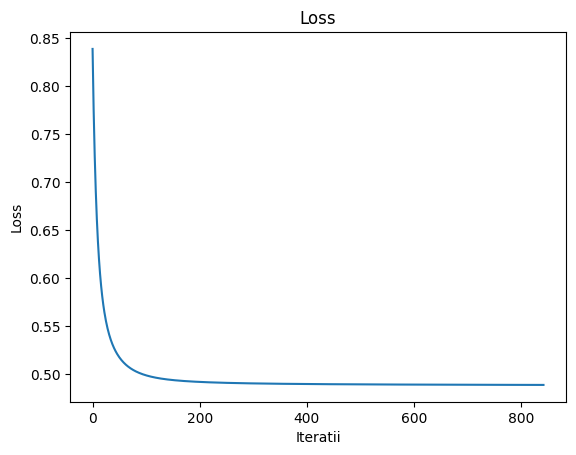

In [26]:
plt.title("Loss")
plt.plot(losses)
plt.xlabel("Iteratii")
plt.ylabel("Loss")

In [27]:
y_pred = predict(X, w)

In [28]:
print(classification_report(y, y_pred))
confusion_matrix = metrics.confusion_matrix(y, y_pred)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5739
           1       0.77      0.81      0.79      5947

    accuracy                           0.78     11686
   macro avg       0.78      0.78      0.78     11686
weighted avg       0.78      0.78      0.78     11686

                 Predicted Negative  Predicted Positive
Actual Negative                4298                1441
Actual Positive                1158                4789
